In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visualization
sns.set(style="whitegrid")

In [2]:
import glob
import os

# Specify the directory containing the CSV files
directory = 'results/'

# Get all CSV file names in the specified directory
csv_files = glob.glob(os.path.join(directory, "*.csv"))

# Check if any CSV files are found
if not csv_files:
    print("No CSV files found in the specified directory:", directory)
else:
    # Load each CSV file into a DataFrame and store in a list
    dataframes = []
    for file in csv_files:
        # Read CSV file and store in the list
        df = pd.read_csv(file)
        dataframes.append(df)

    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)


In [3]:
sorted_combined_df = combined_df.sort_values(by=['Number of Samples', 'Filename'], ascending=[True, True])

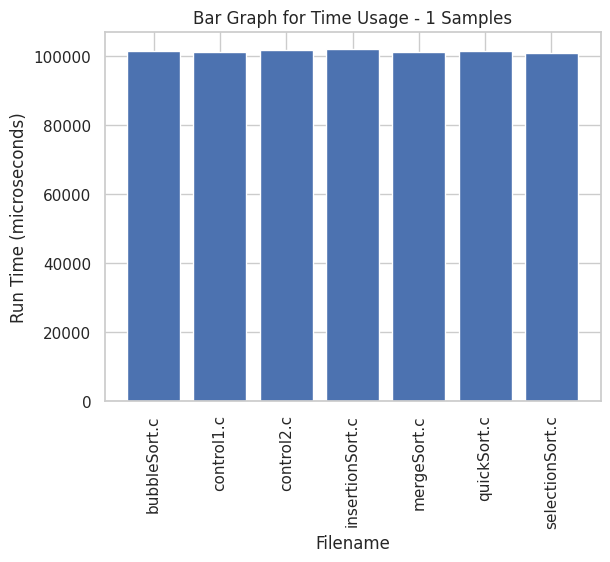

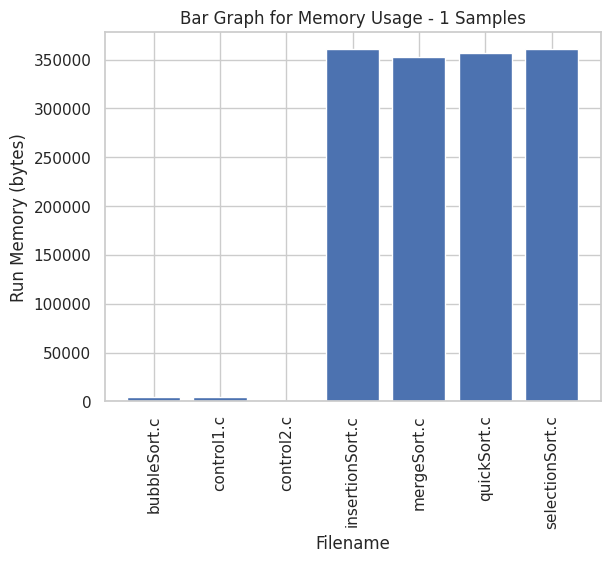

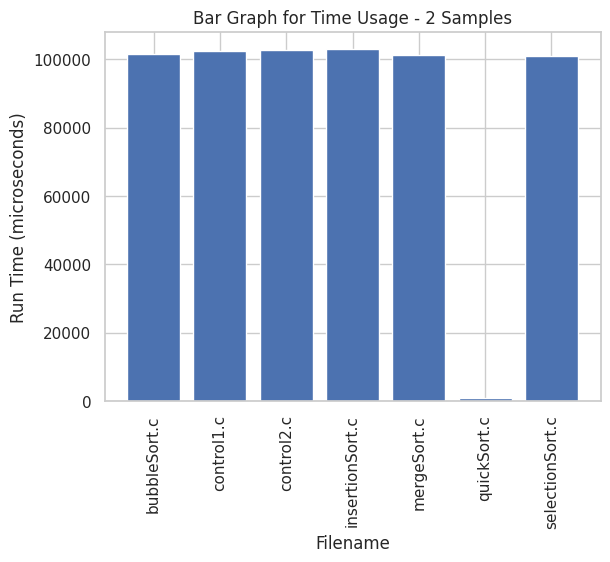

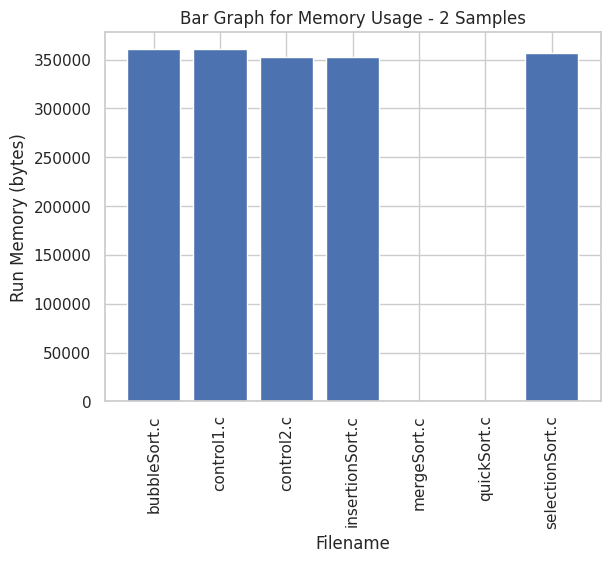

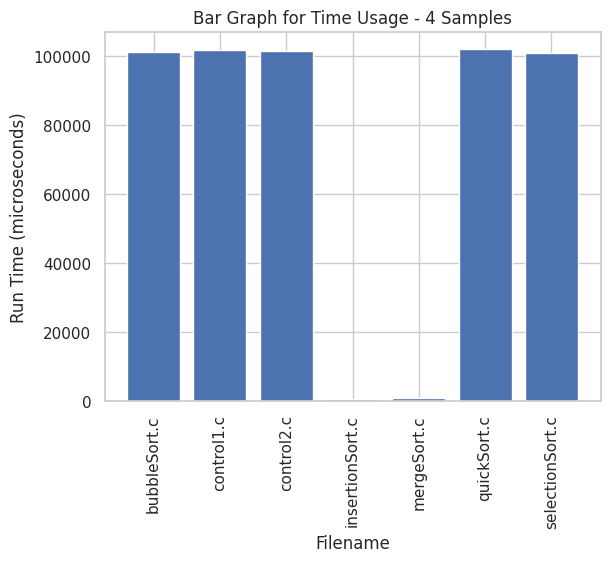

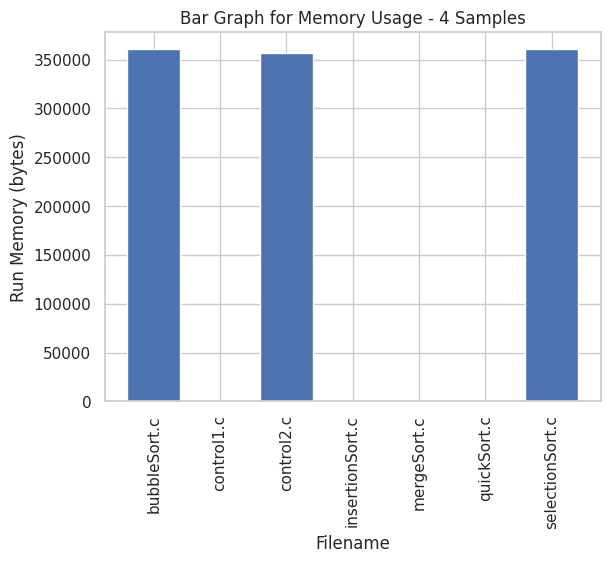

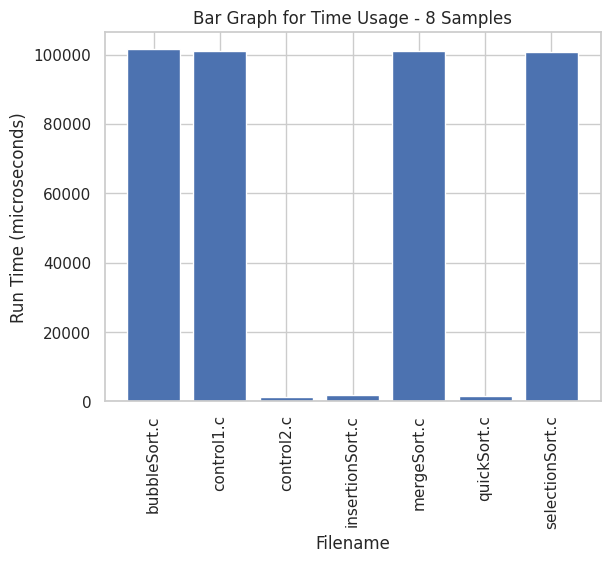

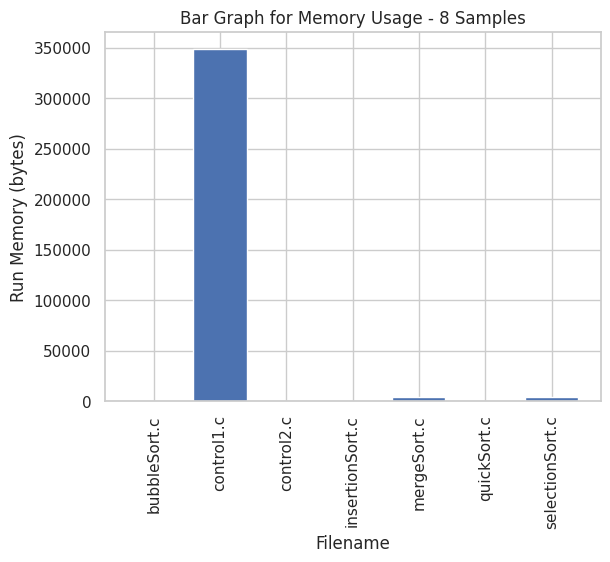

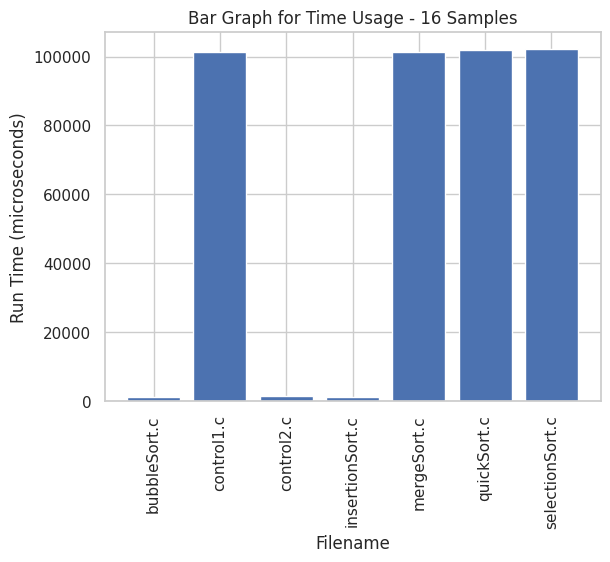

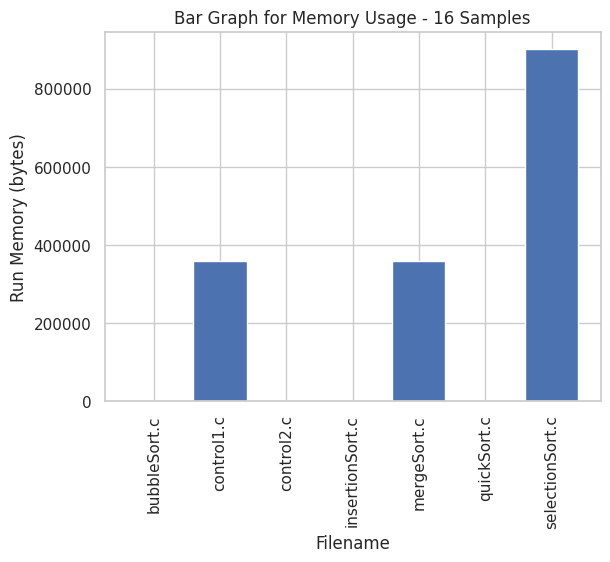

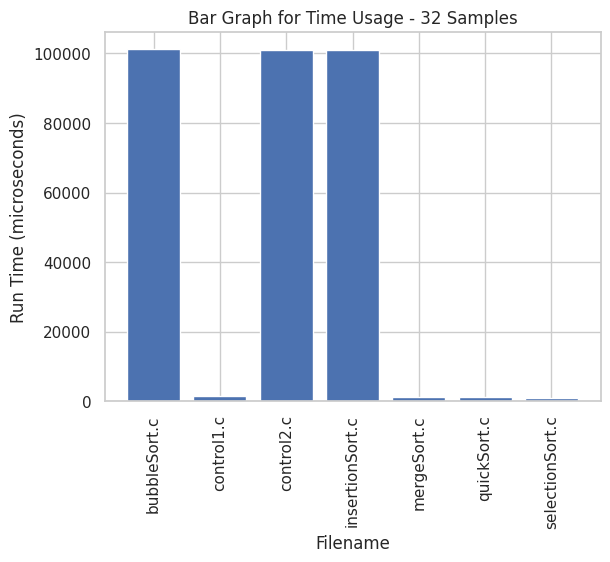

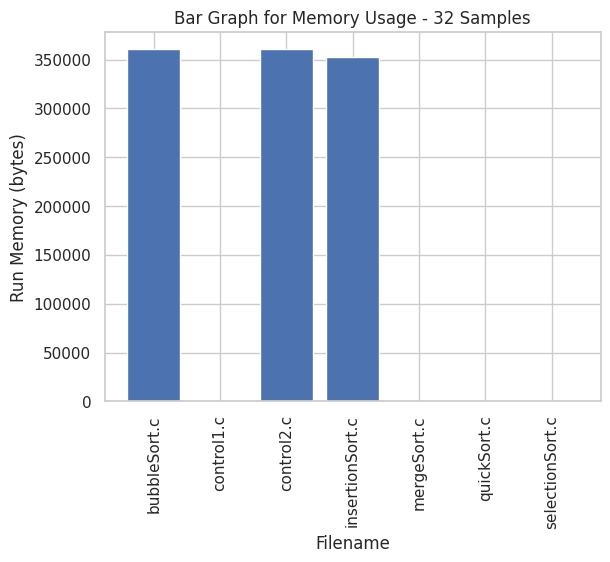

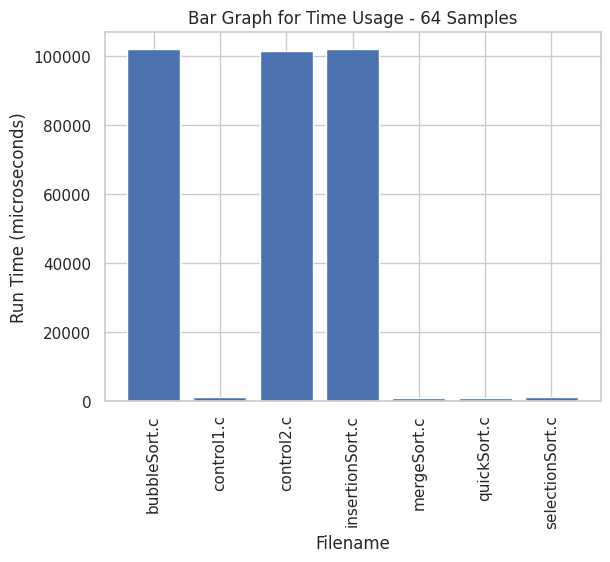

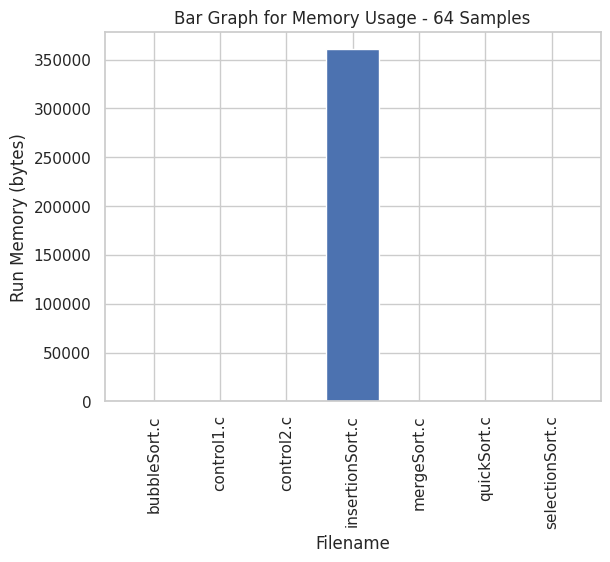

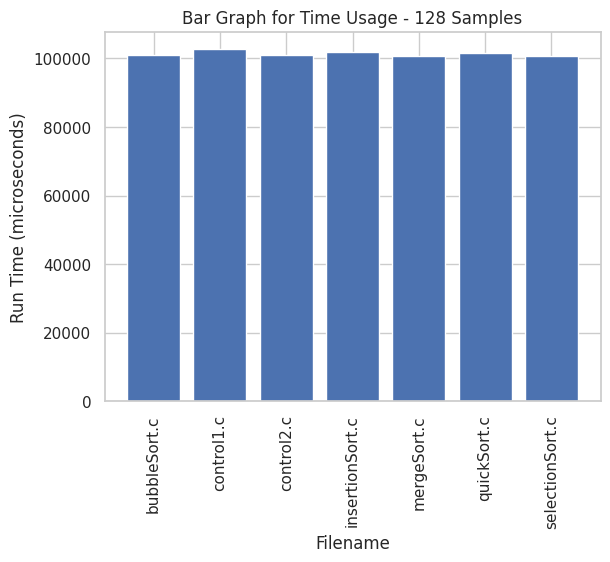

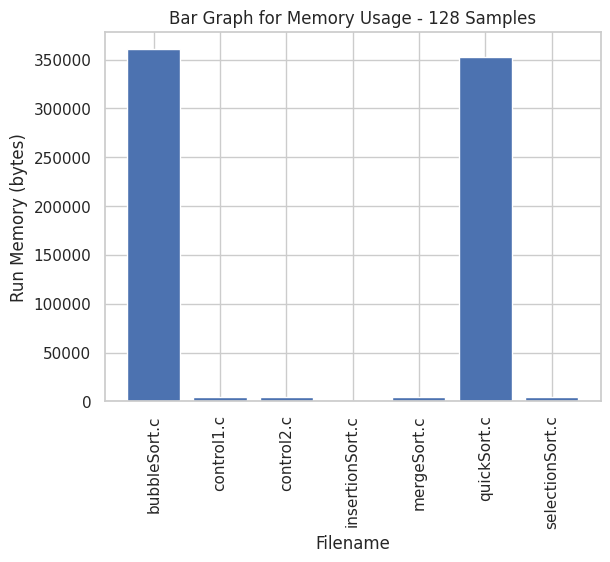

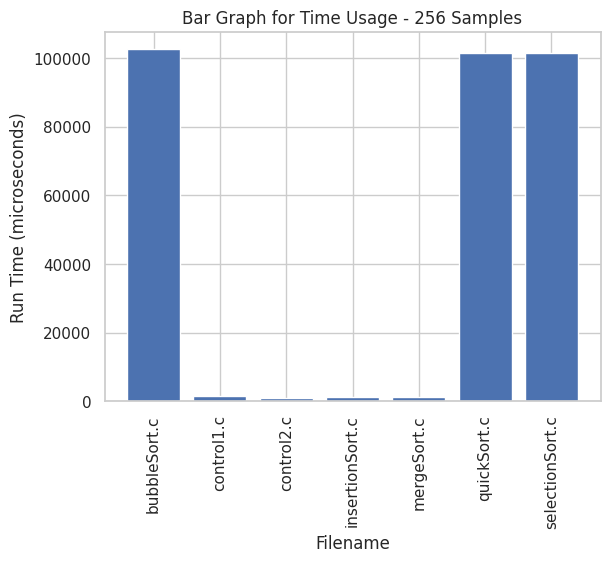

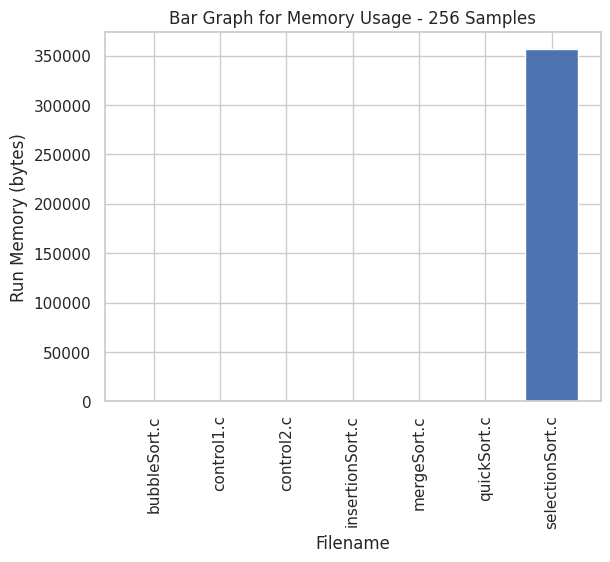

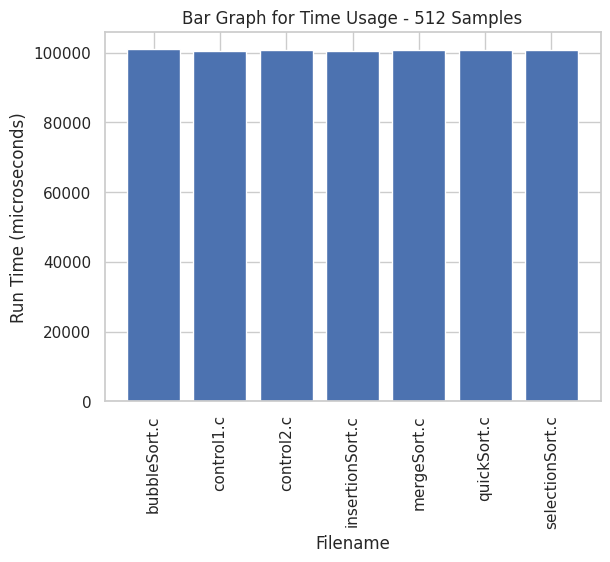

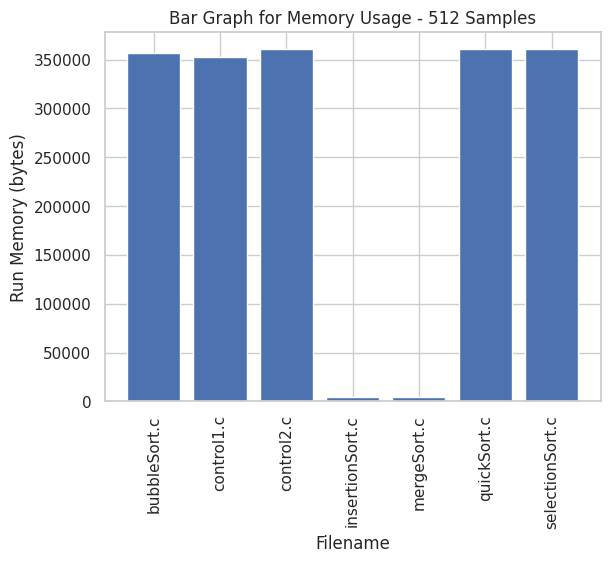

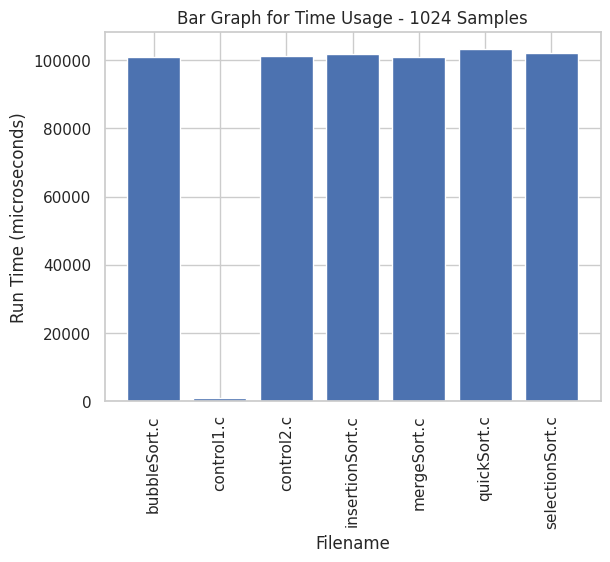

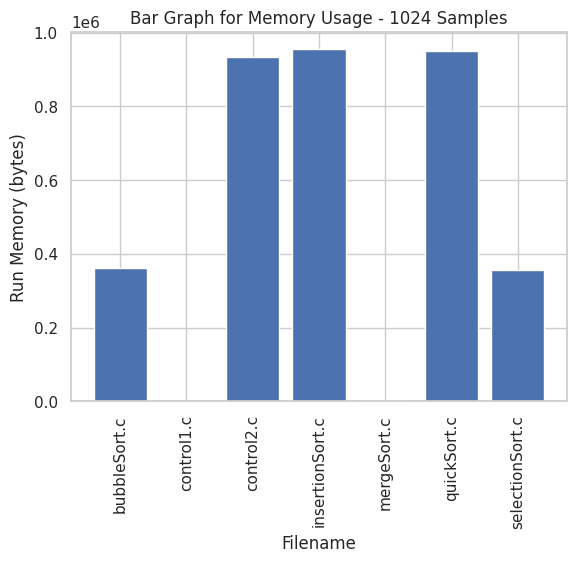

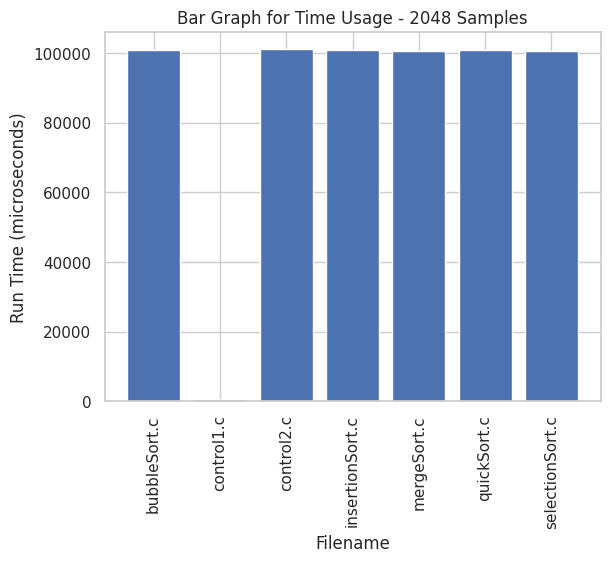

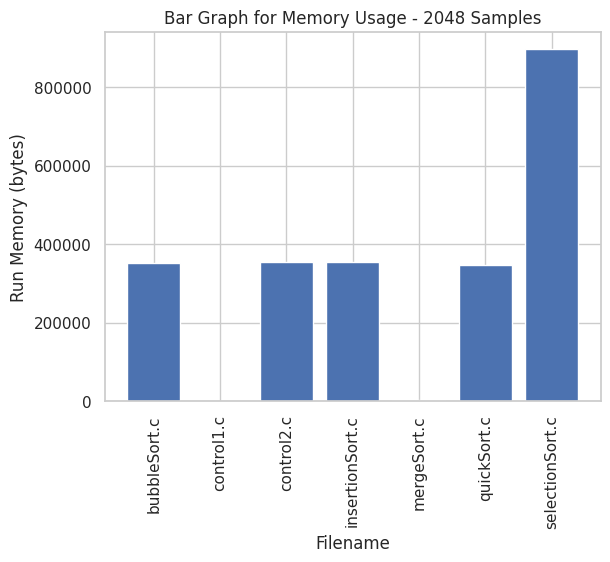

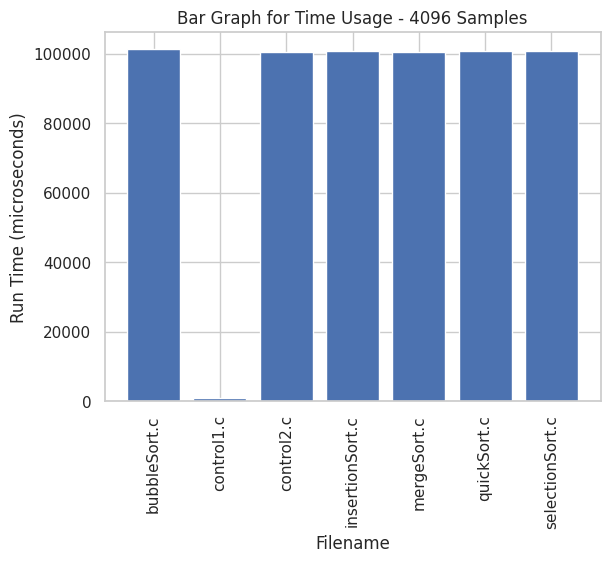

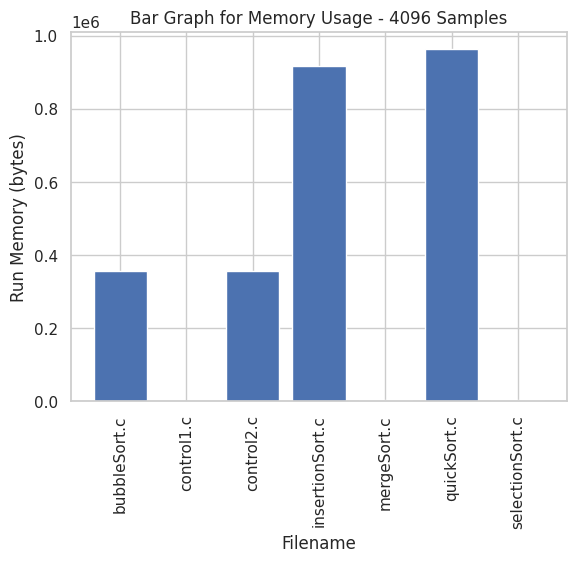

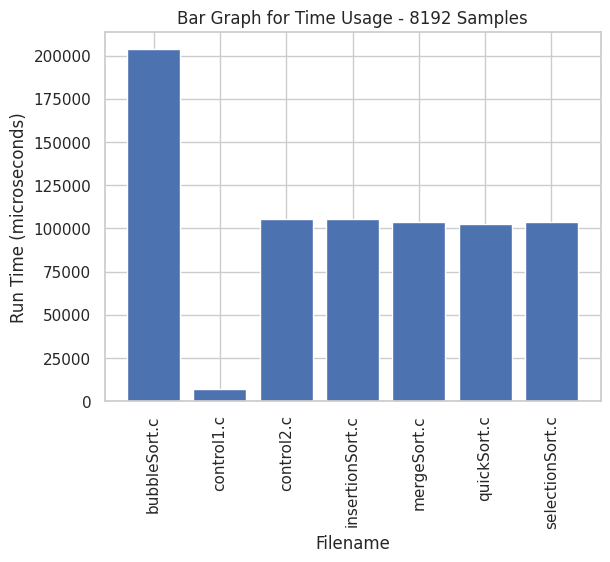

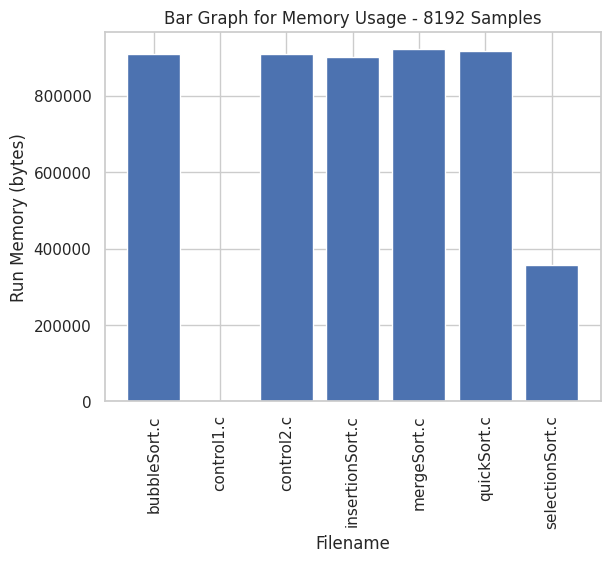

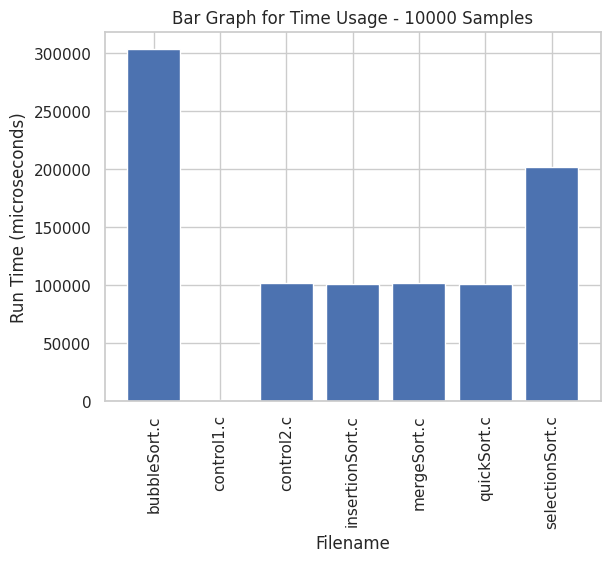

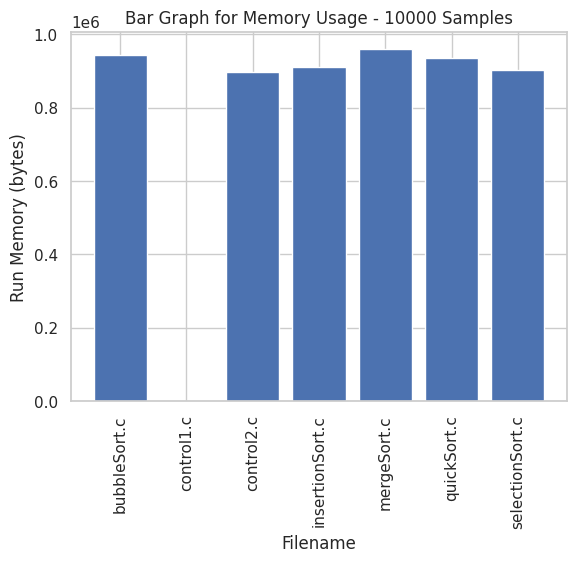

In [5]:
import matplotlib.pyplot as plt

import os

# Create the "graph_picture" folder if it doesn't exist
folder_path = 'graph_picture'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Group the data by the number of samples
grouped_df = sorted_combined_df.groupby('Number of Samples')
# Plot bar graphs for time and memory usage for each group
for group_name, group_df in grouped_df:
    # Plot bar graph for time usage
    plt.figure()
    plt.bar(group_df['Filename'], group_df['Run Time (microseconds)'])
    plt.xlabel('Filename')
    plt.ylabel('Run Time (microseconds)')
    plt.title(f'Bar Graph for Time Usage - {group_name} Samples')
    plt.xticks(rotation=90)
    plt.savefig(os.path.join(folder_path, f'time_usage_{group_name}.png'))
    plt.show()

    # Plot bar graph for memory usage
    plt.figure()
    plt.bar(group_df['Filename'], group_df['Run Memory (bytes)'])
    plt.xlabel('Filename')
    plt.ylabel('Run Memory (bytes)')
    plt.title(f'Bar Graph for Memory Usage - {group_name} Samples')
    plt.xticks(rotation=90)
    plt.savefig(os.path.join(folder_path, f'memory_usage_{group_name}.png'))
    plt.show()

    